# Функция

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x / (2 * x + 5)
x_0 = -1
x_1 = 1
h1 = 0.5
h2 = 0.25

def accuracy(f1, f2):
    return abs(f1 - f2)

In [3]:
# вычислим точное значение интеграла
def f_integrated(a, b):
    return 0.25 * ((2 * b - 5 * np.log(2 * b + 5) + 5) - (2 * a - 5 * np.log(2 * a + 5) + 5))

I = f_integrated(x_0, x_1)
I

-0.05912232548400409

# Метод прямоуголь 

In [44]:
def rectangle_integration(a, b, h):
    integ = 0.0
    x = a
    while x < b:
        integ += f(x + h / 2)
        x += h
    return h*integ


In [45]:
# результат шаг h1
R1 = rectangle_integration(x_0, x_1, h1)
R1

-0.05450105450105448

In [46]:
# результат шаг h2
R2 = rectangle_integration(x_0, x_1, h2)
R2

-0.05794799368631646

# Метод трапеций

In [37]:
def trapeze_integration(a, b, h):
    integ = f(a) / 2
    x = a + h
    while x < b:
        integ += f(x)
        x += h
    return h*(integ + f(x) / 2)


In [38]:
# результат шаг h1
T1 = trapeze_integration(x_0, x_1, h1)
T1

-0.06845238095238095

In [39]:
# результат шаг h1
T2 = trapeze_integration(x_0, x_1, h2)
T2

-0.06147671772671775

# Метод Симпсона

In [29]:
def simpson_integration(a, b, h):
    integ = 0.0
    x = a + h
    while x < b:
        integ += f(x - h) + 4*f(x) + f(x + h)
        x += h + h
    return h*integ/3

In [30]:
# результат шаг h1
S1 = simpson_integration(x_0, x_1, h1)
S1

-0.059523809523809514

In [31]:
# результат шаг h1
S2 = simpson_integration(x_0, x_1, h2)
S2

-0.05915149665149664

# Метод Рунге-Ромберга-Ричардсона

In [13]:
def runge_romberg_richardson(h1, F1, h2, F2, p):
    if h1 < h2:
        return F1 + (F1 - F2) / ((h2 / h1)**p - 1)
    else:
        return F2 + (F2 - F1) / ((h1 / h2)**p - 1)

In [14]:
# метод прямоугольников
RRR_R = runge_romberg_richardson(h1, R1, h2, R2, 2)
RRR_R

-0.05909697341473712

In [15]:
# погрешность 
accuracy(RRR_R, I)

2.535206926697342e-05

In [47]:
# метод трапеций
RRR_T = runge_romberg_richardson(h1, T1, h2, T2, 2)
RRR_T

-0.05915149665149668

In [17]:
# погрешность 
accuracy(RRR_T, I)

2.917116749259069e-05

In [32]:
# метод Симпсона
RRR_S = runge_romberg_richardson(h1, S1, h2, S2, 4)
RRR_S

-0.05912667579334245

In [33]:
# погрешность 
accuracy(RRR_S, I)

4.3503093383606695e-06

# График

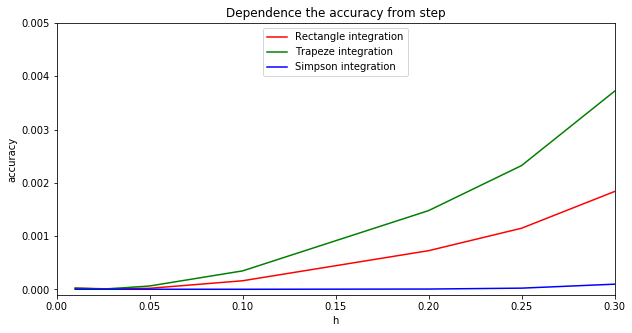

In [20]:
# зависимость погрешности относительно метода Рунге-Ромберга-Ричардсона

x = [0.01,0.02,0.025,0.05, 0.1, 0.2, 0.25, 0.5]

y1 = list(map(lambda step: accuracy(RRR_R, rectangle_integration(x_0, x_1, step)), x))
y2 = list(map(lambda step: accuracy(RRR_T, trapeze_integration(x_0, x_1, step)), x))
y3 = list(map(lambda step: accuracy(RRR_S, simpson_integration(x_0, x_1, step)), x))

fig = plt.figure(figsize=(10, 5))

plt.plot(x, y1,'r', label = 'Rectangle integration')
plt.plot(x, y2,'g', label = 'Trapeze integration')
plt.plot(x, y3,'b', label = 'Simpson integration')

plt.xlabel('h')
plt.ylabel('accuracy')

plt.title('Dependence the accuracy from step')
plt.xlim(0.0, 0.3)
plt.ylim(-0.0001,0.005)

plt.legend(loc='upper center')


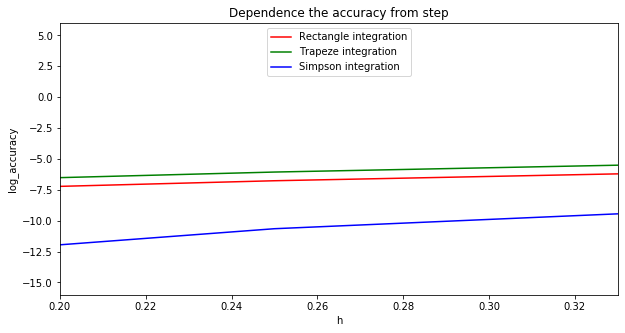

In [57]:
x = [(x_1 - x_0) / i + 0.000001 for i in range(6, 14, 2)]

y1 = list(map(lambda step: np.log(accuracy(RRR_R, rectangle_integration(x_0, x_1, step))), x))
y2 = list(map(lambda step: np.log(accuracy(RRR_T, trapeze_integration(x_0, x_1, step))), x))
y3 = list(map(lambda step: np.log(accuracy(RRR_S, simpson_integration(x_0, x_1, step))), x))

fig = plt.figure(figsize=(10, 5))

plt.plot(x, y1,'r', label = 'Rectangle integration')
plt.plot(x, y2,'g', label = 'Trapeze integration')
plt.plot(x, y3,'b', label = 'Simpson integration')

plt.xlabel('h')
plt.ylabel('log_accuracy')

plt.title('Dependence the accuracy from step')
plt.ylim(-16,6)
plt.xlim(0.2, 0.33)
plt.legend(loc='upper center')
